# Let's write some tests

## Testing environment.py

In [1]:
from IPython.display import HTML
from texrelenv.color import get_kelly_colours

def show_colours(colours):
    html = ""
    for c in colours:
        r, g, b = c
        html += f'<div style="height=2em;width=2em;background:rgb({r}, {g}, {b});">{c}</div>\n'
    return HTML(html, metadata=dict(isolated=True))

show_colours(get_kelly_colours())

In [30]:
from typing import Tuple

def ordinal_to_colour(ordinal: int) -> Tuple[int, int, int]:
    """
    Given an integer, deterministically produce a unique(ish) RGB colour.
    """
    hashstring = str(abs(hash(str(ordinal))))
    a, b, c = int(hashstring[:6]), int(hashstring[6:12]), int(hashstring[12:])
    return ((a % 26) * 10, (b % 26) * 10, (c % 26) * 10)

show_colours([ordinal_to_colour(i) for i in range(20)])

5
1


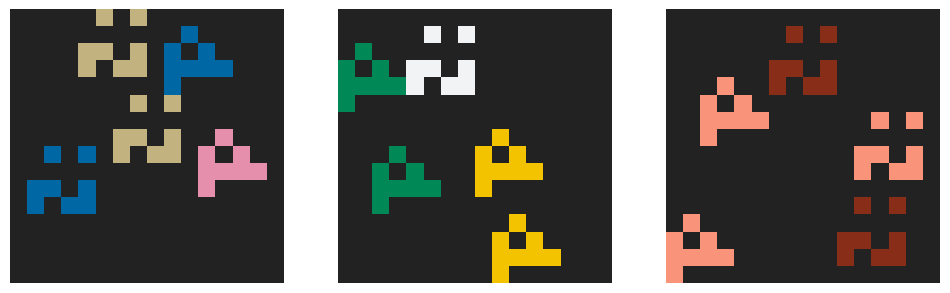

In [23]:
from texrelenv.environment import ThingMaker, Grid
from PIL import Image
import matplotlib.pyplot as plt

tm = ThingMaker(distinct_colors=3, distinct_shapes=2, hold_out=0.20)
print(len(tm.train_things))
print(len(tm.test_things))
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.axis("off")
    grid = Grid(hard_boundary=True)
    things = [tm.thing("test") for _ in range(10)]
    grid.pack(things)
    plt.imshow(Image.fromarray(grid.colorized_image()))
